# 데이터 전처리

### 헤더 변경

In [14]:
INPUT_TABLE_PATH = "../export/vehicles_history.csv"

In [15]:
import pandas as pd

file_path = INPUT_TABLE_PATH  

try:
    df = pd.read_csv(file_path)
    df.columns = [
        "id", "license", "model", "fuel", "cc", "registration_date", 
        "license_changed", "owner_changed", "total_loss", "flood", 
        "theft", "damaged_count", "damaged_total", 
        "damaged_by_other_count", "damaged_by_other_total"
    ]
    df.to_csv(file_path, index=False)
    print("Saved.")
except:
    print("File not found.")

Saved.


### 데이터 테이블 join

In [16]:
HISTORY_TABLE_PATH = "../export/vehicles_history.csv"
PRICE_TABLE_PATH = "../export/vehicles_price.csv"
STATUS_TABLE_PATH = "../export/vehicles_status.csv"
OUTPUT_TABLE_PATH = "../vehicles_data.csv"

In [17]:
import pandas as pd

try:
    vehicles_price = pd.read_csv(PRICE_TABLE_PATH)
    vehicles_history = pd.read_csv(HISTORY_TABLE_PATH)
    vehicles_status = pd.read_csv(STATUS_TABLE_PATH)

    result = vehicles_history.merge(vehicles_price, how='inner', on='id')
    result = result.merge(vehicles_status, how='inner', on='id')

    result.to_csv(OUTPUT_TABLE_PATH, index=False)
    print("Saved.")
except:
    print("File not found.")

Saved.


### 데이터 전처리

#### 데이터 로드

In [1]:
DATA_TABLE_PATH = "../vehicles_data.csv"

In [2]:
import pandas as pd

df = pd.read_csv(DATA_TABLE_PATH)
df

,id,license,model,fuel,cc,registration_date,license_changed,owner_changed,total_loss,flood,...,damaged_by_other_total,price,transmission,warranty,mileage,tuning_history,special_history,usage_change,accident,little_accident
0,38495778,62우8691,올 뉴 모닝,가솔린,998cc,2011/07/08,0,7,0,0,...,0,360,-,보험사보증,"76,483km",없음,없음,없음,있음,있음
1,38571630,205다2531,캐스퍼,가솔린,998cc,2021/11/04,1,2,0,0,...,0,1490,오토,보험사보증,"53,292km",없음,없음,있음 / 렌트,없음,있음
2,38207612,39더7577,코나,디젤,1582cc,2017/10/16,0,2,0,0,...,2862740,1430,오토,보험사보증,"85,241km",없음,없음,없음,없음,없음
3,38285193,801조6184,스타리아,디젤,2199cc,2022/01/11,0,1,0,0,...,960728,2830,오토,보험사보증,"20,674km",없음,없음,없음,없음,없음
4,38476203,152마6679,카니발 4세대,디젤,2151cc,2020/09/17,1,1,0,0,...,0,2800,오토,보험사보증,"72,006km",없음,없음,있음 / 렌트,없음,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99581,38609021,51주4282,뉴SM5 플래티넘,디젤,1461cc,2014/11/06,0,3,0,0,...,0,550,오토,보험사보증,"61,360km",없음,없음,없음,없음,없음
99582,37938829,20저5467,에쿠스(신형),가솔린,3778cc,2011/11/09,0,6,0,0,...,1608620,680,오토,자가보증,"199,325km",없음,없음,없음,없음,있음
99583,38319506,34머4194,말리부,가솔린,1998cc,2012/01/05,1,2,0,0,...,864240,350,오토,보험사보증,"120,209km",없음,없음,있음 / 렌트,없음,없음
99584,38560095,67노1706,올 뉴 프라이드,가솔린,1591cc,2013/02/15,0,3,0,0,...,687280,500,오토,자가보증,"58,310km",없음,없음,없음,없음,있음


#### price outlier 제거
- `z-score` 값이 `3` 이상, `-3` 이하인 경우 이상치로 판단하고 제거

In [3]:
import pandas as pd
from scipy.stats import zscore

# zscore를 이용해 이상치 제거 함수 정의
def remove_outliers_by_zscore(group, column='price'):
    # price 열의 zscore 계산
    group['z_score'] = zscore(group[column])
    # z-score가 -3과 3 사이의 값만 유지
    group = group[(group['z_score'] > -3) & (group['z_score'] < 3)]
    # z_score 열 제거 (필요 없으므로 삭제)
    return group.drop(columns=['z_score'])

# model 별로 price의 zscore를 기준으로 이상치 제거
df = df.groupby('model', group_keys=False).apply(remove_outliers_by_zscore)
df

/var/folders/hj/lk5016vx6lq894kfv79dtc9h0000gn/T/ipykernel_12075/3192833852.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('model', group_keys=False).apply(remove_outliers_by_zscore)


,id,license,model,fuel,cc,registration_date,license_changed,owner_changed,total_loss,flood,...,damaged_by_other_total,price,transmission,warranty,mileage,tuning_history,special_history,usage_change,accident,little_accident
1566,38338142,49로1316,All New SM7,가솔린,2495cc,2011/09/21,0,1,0,0,...,723060,599,-,보험사보증,"69,454km",없음,없음,없음,없음,있음
2612,38282676,24구0381,All New SM7,가솔린,2495cc,2014/03/21,1,3,0,0,...,846040,390,-,보험사보증,"155,705km",없음,없음,없음,없음,있음
2672,38059909,101거5758,All New SM7,가솔린,2495cc,2011/08/31,1,4,0,0,...,906024,330,-,보험사보증,"148,299km",없음,없음,없음,있음,있음
4357,38311494,50어9425,All New SM7,가솔린,2495cc,2014/09/19,0,6,0,0,...,1792758,350,-,자가보증,"188,934km",없음,없음,없음,있음,있음
7012,35839458,37거8132,All New SM7,가솔린,3498cc,2011/12/01,0,7,0,0,...,942380,210,오토,보험사보증,"205,556km",없음,없음,없음,있음,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,38019281,64버9720,프라이드(신형),가솔린,1599cc,2010/11/05,0,2,0,0,...,0,280,오토,자가보증,"126,827km",없음,없음,없음,없음,없음
94939,38500372,42두1261,프라이드(신형),가솔린,1399cc,2010/07/12,0,2,0,0,...,1768390,199,오토,자가보증,"183,289km",없음,없음,없음,있음,있음
95801,38605438,55소8044,프라이드(신형),디젤,1493cc,2010/10/01,1,6,0,0,...,0,290,오토,보험사보증,"140,000km",없음,없음,없음,있음,없음
95964,38093930,59서7990,프라이드(신형),가솔린,1599cc,2010/07/16,0,3,0,0,...,0,350,오토,자가보증,"58,811km",없음,없음,없음,있음,있음


#### 미사용 컬럼 드랍
- `id` , `license`, `license_changed` , `theft` , `warranty`

In [4]:
df = df.drop(['id', 'license', 'license_changed', 'theft', 'warranty'], axis = 1)
df

,model,fuel,cc,registration_date,owner_changed,total_loss,flood,damaged_count,damaged_total,damaged_by_other_count,damaged_by_other_total,price,transmission,mileage,tuning_history,special_history,usage_change,accident,little_accident
1566,All New SM7,가솔린,2495cc,2011/09/21,1,0,0,2,1551310,2,723060,599,-,"69,454km",없음,없음,없음,없음,있음
2612,All New SM7,가솔린,2495cc,2014/03/21,3,0,0,3,4699796,1,846040,390,-,"155,705km",없음,없음,없음,없음,있음
2672,All New SM7,가솔린,2495cc,2011/08/31,4,0,0,2,1188778,2,906024,330,-,"148,299km",없음,없음,없음,있음,있음
4357,All New SM7,가솔린,2495cc,2014/09/19,6,0,0,6,7933557,4,1792758,350,-,"188,934km",없음,없음,없음,있음,있음
7012,All New SM7,가솔린,3498cc,2011/12/01,7,0,0,3,3026380,2,942380,210,오토,"205,556km",없음,없음,없음,있음,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,2010/11/05,2,0,0,1,277750,0,0,280,오토,"126,827km",없음,없음,없음,없음,없음
94939,프라이드(신형),가솔린,1399cc,2010/07/12,2,0,0,4,2344280,1,1768390,199,오토,"183,289km",없음,없음,없음,있음,있음
95801,프라이드(신형),디젤,1493cc,2010/10/01,6,0,0,1,514118,0,0,290,오토,"140,000km",없음,없음,없음,있음,없음
95964,프라이드(신형),가솔린,1599cc,2010/07/16,3,0,0,2,597130,0,0,350,오토,"58,811km",없음,없음,없음,있음,있음


#### binary attribute로 전환
- `total_loss` -> 전손 이력 있으면 1 아니면 모두 0
- `flood` -> 침수 이력 있으면 1 아니면 모두 0
- `tuning_history` -> 튜닝 이력 하나라도 있으면 1 아니면 모두 0
- `special_history` -> 특수 이력 하나라도 있으면 1 아니면 모두 0
- `usage_change` -> 용도 변경 이력 하나라도 있으면 1 아니면 모두 0
- `accident` -> 사고 있으면 1 아니면 0
- `little_accident` -> 단순 수리 있으면 1 아니면 0
- `transmission` -> 변속기 타입은 수동 변속기는 1, 나머지는 0으로 바꾸고 컬럼명을 `manual_transmission` 으로 변환한다.

In [5]:
df['total_loss'] = df['total_loss'].apply(lambda x: 0 if x == 0 else 1)
df['flood'] = df['flood'].apply(lambda x: 0 if x == 0 else 1)

columns = ['tuning_history', 'special_history', 'usage_change', 'accident', 'little_accident']
for column in columns:
    df[column] = df[column].apply(lambda x: 0 if x == '없음' else 1)

df['manual_transmission'] = df['transmission'].apply(lambda x: 1 if x == '수동' else 0)
df = df.drop('transmission', axis=1)

df

,model,fuel,cc,registration_date,owner_changed,total_loss,flood,damaged_count,damaged_total,damaged_by_other_count,damaged_by_other_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission
1566,All New SM7,가솔린,2495cc,2011/09/21,1,0,0,2,1551310,2,723060,599,"69,454km",0,0,0,0,1,0
2612,All New SM7,가솔린,2495cc,2014/03/21,3,0,0,3,4699796,1,846040,390,"155,705km",0,0,0,0,1,0
2672,All New SM7,가솔린,2495cc,2011/08/31,4,0,0,2,1188778,2,906024,330,"148,299km",0,0,0,1,1,0
4357,All New SM7,가솔린,2495cc,2014/09/19,6,0,0,6,7933557,4,1792758,350,"188,934km",0,0,0,1,1,0
7012,All New SM7,가솔린,3498cc,2011/12/01,7,0,0,3,3026380,2,942380,210,"205,556km",0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,2010/11/05,2,0,0,1,277750,0,0,280,"126,827km",0,0,0,0,0,0
94939,프라이드(신형),가솔린,1399cc,2010/07/12,2,0,0,4,2344280,1,1768390,199,"183,289km",0,0,0,1,1,0
95801,프라이드(신형),디젤,1493cc,2010/10/01,6,0,0,1,514118,0,0,290,"140,000km",0,0,0,1,0,0
95964,프라이드(신형),가솔린,1599cc,2010/07/16,3,0,0,2,597130,0,0,350,"58,811km",0,0,0,1,1,0


#### 사고이력 하나로 합친다
- `damaged_count` <= `damaged_count` + `damaged_by_other_count`
- `damaged_total` <= `damaged_total` + `damaged_by_other_total`

In [6]:
df['damaged_count'] = df['damaged_count'] + df['damaged_by_other_count']
df['damaged_total'] = df['damaged_total'] + df['damaged_by_other_total']

df = df.drop(['damaged_by_other_count', 'damaged_by_other_total'], axis=1)
df

,model,fuel,cc,registration_date,owner_changed,total_loss,flood,damaged_count,damaged_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission
1566,All New SM7,가솔린,2495cc,2011/09/21,1,0,0,4,2274370,599,"69,454km",0,0,0,0,1,0
2612,All New SM7,가솔린,2495cc,2014/03/21,3,0,0,4,5545836,390,"155,705km",0,0,0,0,1,0
2672,All New SM7,가솔린,2495cc,2011/08/31,4,0,0,4,2094802,330,"148,299km",0,0,0,1,1,0
4357,All New SM7,가솔린,2495cc,2014/09/19,6,0,0,10,9726315,350,"188,934km",0,0,0,1,1,0
7012,All New SM7,가솔린,3498cc,2011/12/01,7,0,0,5,3968760,210,"205,556km",0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,2010/11/05,2,0,0,1,277750,280,"126,827km",0,0,0,0,0,0
94939,프라이드(신형),가솔린,1399cc,2010/07/12,2,0,0,5,4112670,199,"183,289km",0,0,0,1,1,0
95801,프라이드(신형),디젤,1493cc,2010/10/01,6,0,0,1,514118,290,"140,000km",0,0,0,1,0,0
95964,프라이드(신형),가솔린,1599cc,2010/07/16,3,0,0,2,597130,350,"58,811km",0,0,0,1,1,0


#### 누적주행거리 숫자타입으로 변환
`0`, `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9` 가 아닌 값들은 전부 제거하고, `int` 타입으로 변환한다.

In [7]:
df['mileage'] = df['mileage'].str.replace(r'[^0-9]', '', regex=True)
df['mileage'] = df['mileage'].astype(int)

df

,model,fuel,cc,registration_date,owner_changed,total_loss,flood,damaged_count,damaged_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission
1566,All New SM7,가솔린,2495cc,2011/09/21,1,0,0,4,2274370,599,69454,0,0,0,0,1,0
2612,All New SM7,가솔린,2495cc,2014/03/21,3,0,0,4,5545836,390,155705,0,0,0,0,1,0
2672,All New SM7,가솔린,2495cc,2011/08/31,4,0,0,4,2094802,330,148299,0,0,0,1,1,0
4357,All New SM7,가솔린,2495cc,2014/09/19,6,0,0,10,9726315,350,188934,0,0,0,1,1,0
7012,All New SM7,가솔린,3498cc,2011/12/01,7,0,0,5,3968760,210,205556,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,2010/11/05,2,0,0,1,277750,280,126827,0,0,0,0,0,0
94939,프라이드(신형),가솔린,1399cc,2010/07/12,2,0,0,5,4112670,199,183289,0,0,0,1,1,0
95801,프라이드(신형),디젤,1493cc,2010/10/01,6,0,0,1,514118,290,140000,0,0,0,1,0,0
95964,프라이드(신형),가솔린,1599cc,2010/07/16,3,0,0,2,597130,350,58811,0,0,0,1,1,0


#### 날짜 전처리
현재 날짜를 기준으로 차량의 나이를 계산하고, `registration_date` 컬럼을 `car_age` 로 변환한다.

In [8]:
from datetime import datetime
import numpy as np

# 오늘 날짜
today = datetime.today()

# registration_date를 datetime 형식으로 변환
df['registration_date'] = pd.to_datetime(df['registration_date'])

# 차량 나이 계산
df['car_age'] = (today - df['registration_date']).dt.days / 365.25
df = df.drop('registration_date', axis=1)
df


,model,fuel,cc,owner_changed,total_loss,flood,damaged_count,damaged_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission,car_age
1566,All New SM7,가솔린,2495cc,1,0,0,4,2274370,599,69454,0,0,0,0,1,0,13.212868
2612,All New SM7,가솔린,2495cc,3,0,0,4,5545836,390,155705,0,0,0,0,1,0,10.715948
2672,All New SM7,가솔린,2495cc,4,0,0,4,2094802,330,148299,0,0,0,1,1,0,13.270363
4357,All New SM7,가솔린,2495cc,6,0,0,10,9726315,350,188934,0,0,0,1,1,0,10.217659
7012,All New SM7,가솔린,3498cc,7,0,0,5,3968760,210,205556,0,0,0,1,1,0,13.018480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,2,0,0,1,277750,280,126827,0,0,0,0,0,0,14.088980
94939,프라이드(신형),가솔린,1399cc,2,0,0,5,4112670,199,183289,0,0,0,1,1,0,14.406571
95801,프라이드(신형),디젤,1493cc,6,0,0,1,514118,290,140000,0,0,0,1,0,0,14.184805
95964,프라이드(신형),가솔린,1599cc,3,0,0,2,597130,350,58811,0,0,0,1,1,0,14.395619


#### 큰 값 전처리
- `owner_changed` , `damaged_count` , `damaged_total` , `mileage` , `car_age` 값들에 ln(x + 1) 사용
- `exponential transformation` 은 나중에 고려

In [9]:
columns = ['owner_changed', 'damaged_count', 'damaged_total', 'mileage', 'car_age']
for column in columns:
    df[column] = np.log1p(df[column])

# df['mileage'] = -np.exp(-df['mileage'] / 100000) + 1

df

,model,fuel,cc,owner_changed,total_loss,flood,damaged_count,damaged_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission,car_age
1566,All New SM7,가솔린,2495cc,0.693147,0,0,1.609438,14.637214,599,11.148434,0,0,0,0,1,0,2.654148
2612,All New SM7,가솔린,2495cc,1.386294,0,0,1.609438,15.528558,390,11.955725,0,0,0,0,1,0,2.460951
2672,All New SM7,가솔린,2495cc,1.609438,0,0,1.609438,14.554970,330,11.906993,0,0,0,1,1,0,2.658185
4357,All New SM7,가솔린,2495cc,1.945910,0,0,2.397895,16.090346,350,12.149158,0,0,0,1,1,0,2.417489
7012,All New SM7,가솔린,3498cc,2.079442,0,0,1.791759,15.193965,210,12.233479,0,0,0,1,1,0,2.640376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,1.098612,0,0,0.693147,12.534480,280,11.750587,0,0,0,0,0,0,2.713965
94939,프라이드(신형),가솔린,1399cc,1.098612,0,0,1.791759,15.229583,199,12.118825,0,0,0,1,1,0,2.734794
95801,프라이드(신형),디젤,1493cc,1.945910,0,0,0.693147,13.150210,290,11.849405,0,0,0,1,0,0,2.720295
95964,프라이드(신형),가솔린,1599cc,1.386294,0,0,1.098612,13.299892,350,10.982101,0,0,0,1,1,0,2.734083


### 일단 모델 만든다
- `그랜저 IG` 대상

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

grandeur_data = df[df['model'] == '그랜저 IG']

# grandeur_data = df[df['model'] == '그랜저 IG']
# grandeur_data = pd.get_dummies(grandeur_data, columns=['fuel', 'cc'], drop_first=True)

X = grandeur_data.drop(['model', 'fuel', 'cc', 'price', 'owner_changed'], axis=1)  # 독립 변수
y = grandeur_data['price']  # 종속 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.tolist())

Mean Squared Error (MSE): 44109.59586366819
Root Mean Squared Error (RMSE): 210.02284605172883
Predicted Prices: [1706.7897549  1502.9936876  1922.25651301 2052.2476339  1839.99859411
 2196.29847898 1593.1569754  1669.73969594 1914.003466   2142.7545285
 2164.60551469 1848.34586876 2030.31007498 1592.03449283 1547.453374
 1398.20052409 1817.90720193 1369.09208833 1671.49711257 1742.14648758
 1982.45856457 1774.81411886 1802.53967301 1678.55410524 1914.003466
 1654.92209696 1782.66159145 1592.91693146 1633.58283027 2067.73783747
 2030.8303923  2107.79127804 2107.02561415 2169.53242638 1574.62696278
 1758.75057215 1552.37808723 1290.16787218 1959.27376266 1525.62512849
 1884.18315518 1691.65065    1828.37806955 2077.53315325 1651.13680598
 1676.43614762 1837.53608014 1633.49888518 2153.22116176 1782.7864162
 1316.92589886 1652.75436606 1690.17969592 1950.25621029 1763.82537054
 1723.00460614 1611.26667271 1484.71220462 2267.86739675 1671.49711257
 1797.27760297 2236.02743236 1691.65065  

### 이상치 확인용 pca

In [11]:
DATA_FRAME = grandeur_data

Explained Variance Ratio for each principal component:
Principal Component 1: 0.1711
Principal Component 2: 0.1551
Principal Component 3: 0.0959
Principal Component 4: 0.0784
Principal Component 5: 0.0724
Principal Component 6: 0.0697
Principal Component 7: 0.0628
Principal Component 8: 0.0611
Principal Component 9: 0.0583
Principal Component 10: 0.0532
Principal Component 11: 0.0407
Principal Component 12: 0.0388
Principal Component 13: 0.0311
Principal Component 14: 0.0113
Principal Component 15: 0.0000
Principal Component 16: 0.0000
Principal Component 17: 0.0000
Principal Component 18: 0.0000


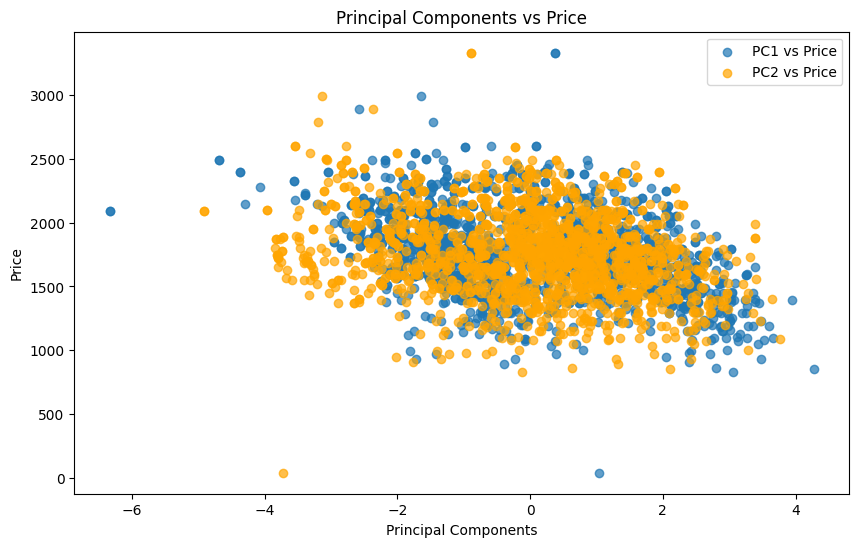

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 준비
# df는 이미 주어진 데이터프레임

# 1. Feature와 Target 분리 (price는 target)
X = DATA_FRAME.drop(['model', 'price'], axis=1)  # 독립 변수
y = DATA_FRAME['price']  # 종속 변수

# 2. 범주형 데이터 One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)  # fuel, cc 등 범주형 데이터 처리

# 3. 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 5. PCA의 설명 분산 비율 확인
explained_variance = pca.explained_variance_ratio_

# 결과 출력
print("Explained Variance Ratio for each principal component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")

# 6. 주요 Principal Components와 price 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], y, alpha=0.7, label="PC1 vs Price")
plt.scatter(X_pca[:, 1], y, alpha=0.7, label="PC2 vs Price", color='orange')
plt.title("Principal Components vs Price")
plt.xlabel("Principal Components")
plt.ylabel("Price")
plt.legend()
plt.show()



### 이상치 때문에 RMSE 너무 높게 나온다

In [13]:
import pandas as pd
from scipy.stats import zscore

# zscore를 이용해 이상치 제거 함수 정의
def remove_outliers_by_zscore(group, column='price'):
    # price 열의 zscore 계산
    group['z_score'] = zscore(group[column])
    # z-score가 -3과 3 사이의 값만 유지
    group = group[(group['z_score'] > -3) & (group['z_score'] < 3)]
    # z_score 열 제거 (필요 없으므로 삭제)
    return group.drop(columns=['z_score'])

# model 별로 price의 zscore를 기준으로 이상치 제거
df = df.groupby('model', group_keys=False).apply(remove_outliers_by_zscore)
df

/var/folders/hj/lk5016vx6lq894kfv79dtc9h0000gn/T/ipykernel_12075/3192833852.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('model', group_keys=False).apply(remove_outliers_by_zscore)


,model,fuel,cc,owner_changed,total_loss,flood,damaged_count,damaged_total,price,mileage,tuning_history,special_history,usage_change,accident,little_accident,manual_transmission,car_age
1566,All New SM7,가솔린,2495cc,0.693147,0,0,1.609438,14.637214,599,11.148434,0,0,0,0,1,0,2.654148
2612,All New SM7,가솔린,2495cc,1.386294,0,0,1.609438,15.528558,390,11.955725,0,0,0,0,1,0,2.460951
2672,All New SM7,가솔린,2495cc,1.609438,0,0,1.609438,14.554970,330,11.906993,0,0,0,1,1,0,2.658185
4357,All New SM7,가솔린,2495cc,1.945910,0,0,2.397895,16.090346,350,12.149158,0,0,0,1,1,0,2.417489
7012,All New SM7,가솔린,3498cc,2.079442,0,0,1.791759,15.193965,210,12.233479,0,0,0,1,1,0,2.640376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94764,프라이드(신형),가솔린,1599cc,1.098612,0,0,0.693147,12.534480,280,11.750587,0,0,0,0,0,0,2.713965
94939,프라이드(신형),가솔린,1399cc,1.098612,0,0,1.791759,15.229583,199,12.118825,0,0,0,1,1,0,2.734794
95801,프라이드(신형),디젤,1493cc,1.945910,0,0,0.693147,13.150210,290,11.849405,0,0,0,1,0,0,2.720295
95964,프라이드(신형),가솔린,1599cc,1.386294,0,0,1.098612,13.299892,350,10.982101,0,0,0,1,1,0,2.734083


# 모델별 평균 가격 출력

In [14]:
average_price_per_model = df.groupby('model')['price'].mean().reset_index()
average_price_per_model

,model,price
0,All New SM7,418.431193
1,All New 마티즈,147.058824
2,EQ900,2306.734694
3,EV3,4156.923077
4,EV6,3396.660000
...,...,...
354,포르테,347.033784
355,포르테 쿱,365.045455
356,포르테 해치백,342.842105
357,프라이드,521.000000
